#Perkelanan

**Anggota Kelompok**:
1. Abdillah Halim Hanafi
2. Achmad Arga Bimantara Akbar
3. Dea Rishanti

**Dataset**:
- Jumlah data : 637976
- sumber : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

**Objektif**:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

#Import modules

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error


#Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_dataset/uber-lyft/uber-and-lyft-dataset-boston-ma.zip")

- id : Unique Identifier
- distance : The distance between source and destination
- cab_type : Uber or Lyft
- time_stamp : Epoch time when data was queried
- source : The starting point of ride
- price : Price estimate for ride in USD
- surge_multiplier : The multiplier by wich price was increased, Default 1
- Product_id : UBer/Lfyt identifier for Cab-type
- name : visible type of the cab EG: Uber Pool, Uberxl
- Temp : Temperature in F
- Location : Location name
- Clouds : clouds
- pressure : pressure in MB
- Rain : Rain in Inches for last Hr.
- Humidity : Humidity in %
- Wind : wind speed in MPH

#EDA

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.shape[0]

637976

##Visualization

In [ ]:
def to_DateTime(timestamp):
  return datetime.fromtimestamp(timestamp)
pd.DataFrame(df['timestamp'].apply(to_DateTime))

,timestamp
0,2018-12-16 09:30:07.890
1,2018-11-27 02:00:23.677
2,2018-11-28 01:00:22.198
3,2018-11-30 04:53:02.749
4,2018-11-29 03:49:20.223
...,...
693066,2018-12-01 23:53:06.000
693067,2018-12-01 23:53:06.000
693068,2018-12-01 23:53:06.000
693069,2018-12-01 23:53:06.000


###Jumlah total taksi Uber vs Lyft dan harga rata-ratanya

In [ ]:
# Jumlah total taksi Uber vs Lyft dan harga rata-ratanya
total_cab_by_cab_type = df.groupby('cab_type', as_index= False ).agg(counts= ('cab_type', 'count'),avg_price = ('price', 'mean'))

#visualisasi
fig1 = px.bar(data_frame=total_cab_by_cab_type, y="cab_type", x="counts", color="avg_price", barmode="group", text_auto=True, title="Jumlah total taksi Uber vs Lyft dan harga rata-ratanya")
fig1.show()

Dari grafik di atas, kita dapat melihat bahwa Uber memiliki lebih banyak taksi daripada Lyft, namun Uber mengenakan harga yang lebih rendah daripada Lyft.

###Jumlah total setiap jenis taksi Uber vs Lyft dan harga rata-ratanya

In [ ]:
#Jumlah total setiap jenis taksi Uber vs Lyft dan harga rata-ratanya
total_cab_by_name = df.groupby(['name'], as_index= False ).agg(number_of_cabs=('name', 'count'),avg_price = ('price', 'mean'))

#Mengubah nama kolom value menjadi total
total_cab_by_name.rename(columns={"name":"cab_type_name"}, inplace=True)

#Mengurutkan berdasarkan kolom avg_price
total_cab_by_name.sort_values(['avg_price'],ascending=False, inplace=True)

#visualisasi
fig1 = px.bar(data_frame=total_cab_by_name, y="cab_type_name", x="avg_price", color="number_of_cabs", barmode="group", text_auto=True, title="Jumlah total setiap jenis taksi Uber vs Lyft dan harga rata-ratanya")
fig1.show()

Berdasarkan grafik di atas, Black SUV Uber dan Lux Black XL membebankan harga tertinggi kepada pelanggan mereka, sedangkan UberPool dan Lyft Shared memberikan harga terendah. Selain itu, Uber memiliki lebih banyak taksi daripada Lyft.

###Harga maksimum setiap jenis taksi Uber vs Lyft

In [ ]:
# Harga maksimum setiap jenis taksi Uber vs Lyft
max_price_cab_type=df.groupby(['cab_type','name'], as_index= False ).agg(max_price=('price', 'max'))

# Mengurutkan berdasarkan kolom max_price
max_price_cab_type.sort_values(['max_price'],ascending=False, inplace=True)

# Visualisasi
fig = px.line(max_price_cab_type, x="name", y="max_price", color='cab_type', text="max_price", title="Harga maksimum setiap jenis taksi Uber vs Lyft")
fig.show()

Grafik di atas menampilkan harga tertinggi yang pernah dibebankan Lyft dan Uber untuk berbagai jenis taksi. Perjalanan paling mahal adalah Lux Black XL, yang memiliki harga maksimum sekitar $97.

###Jumlah total taksi dan harga rata-ratanya dari berbagai asal

In [ ]:
# Jumlah total taksi dan harga rata-ratanya dari berbagai asal
total_cab_by_source = df.groupby(['source'], as_index= False ).agg(number_of_cabs=('name', 'count'),avg_price = ('price', 'mean'))

# Mengurutkan berdasarkan kolom avg_price
total_cab_by_source.sort_values(['avg_price'],ascending=False, inplace=True)

#visualisasi
fig1 = px.bar(data_frame=total_cab_by_source, y="source", x="avg_price", color="number_of_cabs", barmode="group", text_auto=True, title="Jumlah total taksi dan harga rata-ratanya dari berbagai asal")
fig1.show()

Grafik di atas menunjukkan harga rata-rata untuk berbagai jenis taksi dari berbagai sumber. Biaya taksi dari Boston University dan Fenway biasanya lebih tinggi daripada dari Beacon Hill, North End, Haymarket Square, dll. Distrik Finansial adalah tempat paling banyak taksi dioperasikan.

###Harga maksimum yang dibebankan oleh Uber dan Lyft dari berbagai asal

In [ ]:
# Harga maksimum yang dibebankan oleh Uber dan Lyft dari berbagai asal
max_prices_by_cabs_type_from_different_sources=df.groupby(['cab_type','source'], as_index= False ).agg(max_price=('price', 'max'))

# Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
max_prices_by_cabs_type_from_different_sources.sort_values(['cab_type','max_price'], ascending=False,inplace=True)

# visualisasi
fig = px.line(max_prices_by_cabs_type_from_different_sources, x="source", y="max_price", color='cab_type', text="max_price", title="Harga maksimum yang dibebankan oleh Uber dan Lyft dari berbagai asal")
fig.show()

Grafik di atas menampilkan harga tertinggi yang pernah dikeluarkan oleh Uber dan Lyft dari sejumlah sumber. Lyft sejauh ini membebankan harga maksimum dari lokasi seperti Financial District, Boston University, Fenway, Theatre District, Northeastern University, Back bay, South station, North Station, West End, Beacon Hill, North End dan Hypermarket Square. Sementara Uber melakukannya dari lokasi seperti Financial District, North Station, Fenway, Theatre District, West End, North End, Back Ba, Boston University, Haymarket Square, Northeastern University, Beacon Hill, South Station

###Jumlah total taksi dan harga rata-ratanya ke berbagai tujuan

In [ ]:
# Jumlah total taksi dan harga rata-ratanya ke berbagai tujuan
total_cab_by_destination = df.groupby(['destination'], as_index= False ).agg(number_of_cabs=('name', 'count'),avg_price = ('price', 'mean'))

# Mengurutkan berdasarkan kolom avg_price
total_cab_by_destination.sort_values(['avg_price'],ascending=False, inplace=True)

# Visualisasi
fig1 = px.bar(data_frame=total_cab_by_destination, y="destination", x="avg_price", color="number_of_cabs", barmode="group", text_auto=True, title="Jumlah total taksi dan harga rata-ratanya ke berbagai tujuan")
fig1.show()

Grafik di atas menunjukkan harga rata-rata untuk berbagai jenis taksi ke berbagai tujuan. Biaya taksi ke Boston University dan Fenway lebih tinggi daripada biaya ke South station, North End, Haymarket Square, dll. Finacial district adalah tempat paling banyak taksi dioperasikan

###Harga maksimum yang dibebankan oleh Uber dan Lyft ke berbagai tujuan

In [ ]:
# Harga maksimum yang dibebankan oleh Uber dan Lyft ke berbagai tujuan
max_prices_by_cabs_type_from_different_destination=df.groupby(['cab_type','destination'], as_index= False ).agg(max_price=('price', 'max'))

#Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
max_prices_by_cabs_type_from_different_destination.sort_values(['cab_type','max_price'], ascending=False,inplace=True)

#visualisasi
fig = px.line(max_prices_by_cabs_type_from_different_destination, x="destination", y="max_price", color='cab_type', text="max_price", title="Harga maksimum yang dibebankan oleh Uber dan Lyft ke berbagai tujuan")
fig.show()

Grafik di atas menampilkan harga tertinggi yang pernah dikeluarkan oleh Uber dan Lyft ke sejumlah tujuan. Harga tertinggi yang pernah dibebankan oleh Uber adalah dengan tujuan Universitas Northeastern. sedangkan Harga tertinggi yang pernah dibebankan oleh Lyft adalah dengan tujuan Fenway.

###Harga rata-rata setiap jenis taksi pada bulan November vs Desember

In [ ]:
# Harga rata-rata setiap jenis taksi pada bulan November vs Desember
avg_for_each_cab_type_on_nov_des=df.groupby(['month','name'], as_index= False ).agg(avg_price=('price', 'mean'))

#Mengubah nama kolom name menjadi cab_type
avg_for_each_cab_type_on_nov_des.rename(columns={"name":"cab_type"}, inplace=True)

# Mengubah nilai numerik menjadi kategori
for i in avg_for_each_cab_type_on_nov_des["month"]:
    if i==11:
        avg_for_each_cab_type_on_nov_des['month']=avg_for_each_cab_type_on_nov_des['month'].replace([i],"November")
    elif i==12:
        avg_for_each_cab_type_on_nov_des['month']=avg_for_each_cab_type_on_nov_des['month'].replace([i],"Desember")

# visualisasi
fig =  px.bar(data_frame=avg_for_each_cab_type_on_nov_des, y="month", x="avg_price", color="cab_type",  text_auto=True, title="Harga rata-rata setiap jenis taksi pada bulan November vs Desember")
fig.show()

Data menunjukkan bahwa dengan perbedaan yang sangat tipis, tarif taksi untuk bulan Desember lebih murah daripada bulan November untuk jenis taksi seperti Lux Black XL, WAV, UberX, dan UberPool. Tarif untuk taksi jenis lain sedikit meningkat di bulan Desember. Secara umum, tarif taksi hampir sama di kedua bulan tersebut.

###Harga maksimum setiap jenis taksi pada bulan November vs Desember

In [ ]:
# Harga maksimum setiap jenis taksi pada bulan November vs Desember
max_for_each_cab_type_on_nov_des=df.groupby(['month','name'], as_index= False ).agg(max_price=('price', 'max'))

#Mengubah nama kolom value menjadi total
max_for_each_cab_type_on_nov_des.rename(columns={"name":"cab_type"}, inplace=True)

# Mengubah nilai numerik menjadi kategori
for i in max_for_each_cab_type_on_nov_des["month"]:
    if i==11:
        max_for_each_cab_type_on_nov_des['month']=max_for_each_cab_type_on_nov_des['month'].replace([i],"November")
    elif i==12:
        max_for_each_cab_type_on_nov_des['month']=max_for_each_cab_type_on_nov_des['month'].replace([i],"Desember")

# visualisasi
fig =  px.bar(data_frame=max_for_each_cab_type_on_nov_des, y="month", x="max_price", color="cab_type",  text_auto=True, title="Harga maksimum setiap jenis taksi pada bulan November vs Desember")
fig.show()

Data menunjukkan bahwa untuk jenis taksi seperti Lux Black XL, Uber Black, dan WAV, harga tertinggi yang pernah dikenakan adalah pada bulan Desember, namun untuk jenis taksi seperti Lux Black, UberX, dan Shared, harga tertinggi yang pernah dikenakan adalah sama untuk keduanya. bulan.

###Jumlah total setiap jenis taksi pada bulan November vs Desember

In [ ]:
# Jumlah setiap jenis taksi pada bulan November vs Desember
count_for_each_cab_type_on_nov_des=df.groupby(['month','name'], as_index= False ).agg(count=('name', 'count'))

#Mengubah nama kolom value menjadi total
count_for_each_cab_type_on_nov_des.rename(columns={"name":"cab_type"}, inplace=True)

# Mengubah nilai numerik menjadi kategori
for i in count_for_each_cab_type_on_nov_des["month"]:
    if i==11:
        count_for_each_cab_type_on_nov_des['month']=count_for_each_cab_type_on_nov_des['month'].replace([i],"November")
    elif i==12:
        count_for_each_cab_type_on_nov_des['month']=count_for_each_cab_type_on_nov_des['month'].replace([i],"Desember")

# visualisasi
fig =  px.bar(data_frame=count_for_each_cab_type_on_nov_des, y="month", x="count", color="cab_type",  text_auto=True, title="Jumlah setiap jenis taksi pada bulan November vs Desember")
fig.show()

Data menunjukkan bahwa ada lebih banyak jumlah taksi dari setiap jenis taksi di bulan Desember daripada di bulan November, yang sebagian dapat dikaitkan dengan fakta bahwa lebih sedikit hari di bulan November yang dimasukkan dalam kumpulan data.

###Jumlah total setiap jenis taksi pada hari tertentu di bulan November vs Desember

In [ ]:
# Jumlah setiap jenis taksi pada bulan November vs Desember
count_for_each_cab_type_on_nov_des=df.groupby(['day','name'], as_index= False ).agg(count=('name', 'count'))

#Mengubah nama kolom name menjadi cab_type
count_for_each_cab_type_on_nov_des.rename(columns={"name":"cab_type"}, inplace=True)

# visualisasi
fig =  px.bar(data_frame=count_for_each_cab_type_on_nov_des, x="day", y="count", color="cab_type",  text_auto=True, title="Jumlah total setiap jenis taksi pada hari tertentu di bulan November vs Desember")
fig.show()

Menurut data, ada jumlah taksi terbesar dari setiap jenis pada tanggal seperti 26 dan 27 November, dengan jumlah taksi Uber dan Lyft yang kira-kira sama pada tanggal yang berbeda.

###Max price dan Surge_multiplier selama kondisi cuaca yang berbeda

In [ ]:
# Max price dan Surge_multiplier selama kondisi cuaca yang berbeda
max_prices_by_cabs_type_from_different_destination=df.groupby(['surge_multiplier','short_summary'], as_index= False ).agg(max_price=('price', 'max'))

#Mengubah nama kolom name menjadi cab_type
max_prices_by_cabs_type_from_different_destination.rename(columns={"short_summary":"weather conditions"}, inplace=True)

#visualisasi
fig = px.line(max_prices_by_cabs_type_from_different_destination, x="surge_multiplier", y="max_price", color='weather conditions', text="max_price", title="Max price dan Surge_multiplier selama kondisi cuaca yang berbeda")
fig.show()

Grafik menampilkan max price dan hubungannya dengan surge multiplier selama kondisi cuaca yang berbeda.

###Mean price dan Surge_multiplier selama kondisi cuaca yang berbeda

In [ ]:
# Max price dan Surge_multiplier selama kondisi cuaca yang berbeda
mean_prices_by_cabs_type_from_different_destination=df.groupby(['surge_multiplier','short_summary'], as_index= False ).agg(mean_price=('price', 'mean'))

#Mengubah nama kolom name menjadi cab_type
mean_prices_by_cabs_type_from_different_destination.rename(columns={"short_summary":"weather conditions"}, inplace=True)

#visualisasi
fig = px.line(mean_prices_by_cabs_type_from_different_destination, x="surge_multiplier", y="mean_price", color='weather conditions', title="Mean price dan Surge_multiplier selama kondisi cuaca yang berbeda")
fig.show()

Grafik menampilkan mean price dan hubungannya dengan surge multiplier selama kondisi cuaca yang berbeda.

###Harga maksimum untuk berbagai asal dan tujuan

In [ ]:
# Harga maksimum untuk berbagai asal dan tujuan
max_prices_for_various_sources_and_destinations=df.groupby(['source','destination'], as_index= False ).agg(max_price=('price', 'max'))

#Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
max_prices_for_various_sources_and_destinations.sort_values(['max_price'], ascending=False,inplace=True)

# visualisasi
fig =  px.bar(data_frame=max_prices_for_various_sources_and_destinations, y="source", x="max_price", color="destination",  text_auto=True, title="Harga maksimum untuk berbagai asal dan tujuan")
fig.show()

Grafik menampilkan tarif tertinggi yang pernah dibebankan Uber dan Lyft antara berbagai sumber dan tujuan. Perjalanan dari Financial District ke Fenway memiliki tarif maksimum tertinggi.

###Harga rata-rata untuk berbagai asal dan tujuan

In [ ]:
# Harga rata-rata untuk berbagai sumber dan tujuan
mean_prices_for_various_sources_and_destinations=df.groupby(['source','destination'], as_index= False ).agg(mean_price=('price', 'mean'))

#Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
mean_prices_for_various_sources_and_destinations.sort_values(['mean_price'], ascending=False,inplace=True)

# visualisasi
fig =  px.bar(data_frame=mean_prices_for_various_sources_and_destinations, y="source", x="mean_price", color="destination",  text_auto=True, title="Harga rata-rata untuk berbagai sumber dan tujuan")
fig.show()

Tarif tipikal Uber dan Lyft antara berbagai asal dan tujuan ditampilkan pada grafik. Rute termahal biasanya dari Financial District ke Boston University, sedangkan yang paling murah adalah dari Haymarket Square ke North Station

###Harga maksimum Uber vs Lyft untuk berbagai asal dan tujuan

In [ ]:
# Harga maksimum Uber vs Lyft untuk berbagai asal dan tujuan
max_prices_for_various_sources_and_destinations=df.groupby(['cab_type','source','destination'], as_index= False ).agg(max_price=('price', "max"))

#Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
max_prices_for_various_sources_and_destinations.sort_values(['max_price'], ascending=False,inplace=True)

max_price_uber= max_prices_for_various_sources_and_destinations.loc[max_prices_for_various_sources_and_destinations["cab_type"]=="Uber"]
# # visualisasi
fig =  px.bar(data_frame=max_price_uber, y="source", x="max_price", color="destination",  text_auto=True, title="Harga maksimal Uber untuk berbagai asal dan tujuan")
fig.show()

max_price_lyft= max_prices_for_various_sources_and_destinations.loc[max_prices_for_various_sources_and_destinations["cab_type"]=="Lyft"]
# # visualisasi
fig =  px.bar(data_frame=max_price_lyft, y="source", x="max_price", color="destination",  text_auto=True, title="Harga maksimal Lyft untuk berbagai asal dan tujuan")
fig.show()

Tarif maksimum Uber dan Lyft yangdibebankan antara asal dan tujuan yang berbeda ditampilkan pada grafik. Uber membebankan harga maksimum 89.5 dolar dari Financial District ke Northeastern University sedangkan Lyft membebankan harga maksimum 97.5 dolar dari Financial District ke Fenway.

###Harga rata-rata Uber vs Lyft untuk berbagai asal dan tujuan

In [ ]:
# Harga rata-rata Uber vs Lyft untuk berbagai asal dan tujuan
mean_prices_for_various_sources_and_destinations=df.groupby(['cab_type','source','destination'], as_index= False ).agg(mean_price=('price', "mean"))

#Mengurutkan berdasarkan kolom 'cab_type' dan 'max_price'
mean_prices_for_various_sources_and_destinations.sort_values(['mean_price'], ascending=False,inplace=True)

max_price_uber= mean_prices_for_various_sources_and_destinations.loc[mean_prices_for_various_sources_and_destinations["cab_type"]=="Uber"]
# # visualisasi
fig =  px.bar(data_frame=max_price_uber, y="source", x="mean_price", color="destination",  text_auto=True, title="Harga rata-rata Uber untuk berbagai asal dan tujuan")
fig.show()

max_price_lyft= mean_prices_for_various_sources_and_destinations.loc[mean_prices_for_various_sources_and_destinations["cab_type"]=="Lyft"]
# # visualisasi
fig =  px.bar(data_frame=max_price_lyft, y="source", x="mean_price", color="destination",  text_auto=True, title="Harga rata-rata Lyft untuk berbagai asla dan tujuan")
fig.show()

Grafik menampilkan tarif rata-rata untuk Uber dan Lyft antara berbagai asal dan tujuan. Untuk perjalanan yang sama, Lyft biasanya mengenakan biaya lebih mahal daripada Uber. Untuk Uber dan Lyft, rute termahal adalah dari Distrik Keuangan ke Universitas Boston. Selain itu, untuk Uber dan Lyft, perjalanan termurah masing-masing adalah dari Haymarket Square ke Stasiun Utara dan dari Distrik Keuangan ke Stasiun Selatan.

##Checking na value

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
data_=pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df.shape[0]*100
data_

,Number Of Null,Percentage
id,0,0.000000
timestamp,0,0.000000
hour,0,0.000000
day,0,0.000000
month,0,0.000000
datetime,0,0.000000
timezone,0,0.000000
source,0,0.000000
destination,0,0.000000
cab_type,0,0.000000


Setelah dihilat presentasi na value dari data keseluruhan lebih dari 7%

##Missing Data Mechasimes

In [ ]:
df['price_null'] = np.where(df.price.isnull(), 1, 0)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_null
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0


In [ ]:
print('Value Counts')
print(df.groupby(['cab_type'])['price_null'].value_counts())

print('\nMean')
print(df.groupby(['cab_type'])['price_null'].mean())

Value Counts
cab_type  price_null
Lyft      0             307408
Uber      0             330568
          1              55095
Name: price_null, dtype: int64

Mean
cab_type
Lyft    0.000000
Uber    0.142858
Name: price_null, dtype: float64


Data price yang hilang hanya terdapat pada taksi tipe uber saja

In [ ]:
print('Value Counts')
print(df.groupby(['name'])['price_null'].value_counts())

print('\nMean')
print(df.groupby(['name'])['price_null'].mean())

Value Counts
name          price_null
Black         0             55095
Black SUV     0             55096
Lux           0             51235
Lux Black     0             51235
Lux Black XL  0             51235
Lyft          0             51235
Lyft XL       0             51235
Shared        0             51233
Taxi          1             55095
UberPool      0             55091
UberX         0             55094
UberXL        0             55096
WAV           0             55096
Name: price_null, dtype: int64

Mean
name
Black           0.0
Black SUV       0.0
Lux             0.0
Lux Black       0.0
Lux Black XL    0.0
Lyft            0.0
Lyft XL         0.0
Shared          0.0
Taxi            1.0
UberPool        0.0
UberX           0.0
UberXL          0.0
WAV             0.0
Name: price_null, dtype: float64


In [ ]:
df['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

uber bertipe taxi tidak memiliki data price sama sekali

Setelah melihat lebih dalam pada na_values pada dataset dapat disimpulkan bahwa data tersebut Missing Not At Random

##Checking Correlation

In [ ]:
label = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='O').columns:
    df_encoded[col]=label.fit_transform(df_encoded[col])

Label encoder digunakan untuk mengganti value dari kolom categorical menjadi numerical agar dapat melihat korelasi di seluruh data

In [ ]:
correlation = df_encoded.corr()
correlation

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_null
id,1.000000,0.001034,-0.000012,-0.001298,0.001436,0.001070,NaN,-0.001737,-0.000106,-0.001917,...,0.001032,-0.000530,0.001027,-0.000218,0.001001,-0.000844,0.001042,-0.000189,0.001008,0.000293
timestamp,0.001034,1.000000,-0.028004,-0.341292,0.771182,0.967438,NaN,-0.000531,-0.001181,0.000854,...,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276,0.000318
hour,-0.000012,-0.028004,1.000000,0.066090,-0.079379,-0.031359,NaN,0.002685,-0.004190,-0.001257,...,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785,0.000298
day,-0.001298,-0.341292,0.066090,1.000000,-0.861306,-0.474329,NaN,-0.000760,-0.001813,0.001868,...,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411,-0.001128
month,0.001436,0.771182,-0.079379,-0.861306,1.000000,0.843555,NaN,0.000174,0.000670,-0.000776,...,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896,0.000927
datetime,0.001070,0.967438,-0.031359,-0.474329,0.843555,1.000000,NaN,0.000379,-0.001345,0.000679,...,0.966563,-0.213806,0.966703,-0.071431,0.965792,-0.295646,0.965514,-0.047658,0.965897,0.000488
timezone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,-0.001737,-0.000531,0.002685,-0.000760,0.000174,0.000379,NaN,1.000000,-0.007584,0.000912,...,-0.000515,0.000545,-0.000349,0.000599,-0.000595,-0.000112,-0.000417,0.000514,-0.000573,0.000247
destination,-0.000106,-0.001181,-0.004190,-0.001813,0.000670,-0.001345,NaN,-0.007584,1.000000,0.000835,...,-0.001222,-0.000603,-0.001170,0.000851,-0.001226,0.001010,-0.001163,0.002080,-0.001204,0.000215
cab_type,-0.001917,0.000854,-0.001257,0.001868,-0.000776,0.000679,NaN,0.000912,0.000835,1.000000,...,0.000905,-0.001249,0.000940,-0.002849,0.000874,-0.002211,0.000902,-0.003340,0.000857,0.262366


In [ ]:
correlation['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.067795
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
short_summary                  0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760


setelah melihat korelasi dengan variabel price,variabel distance, surge_multiplier, dan product_id memiliki korelasi yang tinggi, surge_multiplier merupakan penambahan dari harga tarif kendaraan, penambahan harga ini juga dipengaruhi oleh beberapa faktor, mengidentifikasinya dengan korelasi variabel lain dengan surge_multiplier

In [ ]:
correlation['surge_multiplier'].sort_values(ascending=False)

surge_multiplier               1.000000
price                          0.240458
product_id                     0.158438
distance                       0.024769
ozone                          0.003324
windSpeed                      0.002511
windBearing                    0.002167
windGust                       0.002093
visibility.1                   0.001714
visibility                     0.001714
id                             0.001536
day                            0.001389
latitude                       0.001375
datetime                       0.000668
temperatureLowTime             0.000573
timestamp                      0.000572
temperatureMinTime             0.000554
apparentTemperatureLowTime     0.000551
sunsetTime                     0.000544
sunriseTime                    0.000544
uvIndexTime                    0.000544
temperatureMaxTime             0.000522
temperatureHighTime            0.000520
apparentTemperatureHighTime    0.000520
apparentTemperatureMaxTime     0.000519


sama seperti sebelumnya variabel yang memiliki korelasi tinggi dengan surge_multiplier adalah price, product_id, dan distance, product_id merupakan id dari tipe kendaraan Uber/Lyft

In [ ]:
df['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

karena beberapa value dari product_id tidak dapat dikenali, maka product_id akan diganti dengan variabel 'name'

#Data cleaning

In [ ]:
df = df.dropna()

Hapus na value menggunakan function drop. penghapusan na value dikarenakan na value terletak pada variabel yang akan di jadikan target

In [ ]:
print('Value Counts')
print(df.groupby(['name'])['price_null'].value_counts())

print('\nMean')
print(df.groupby(['name'])['price_null'].mean())

Value Counts
name          price_null
Black         0             55095
Black SUV     0             55096
Lux           0             51235
Lux Black     0             51235
Lux Black XL  0             51235
Lyft          0             51235
Lyft XL       0             51235
Shared        0             51233
UberPool      0             55091
UberX         0             55094
UberXL        0             55096
WAV           0             55096
Name: price_null, dtype: int64

Mean
name
Black           0.0
Black SUV       0.0
Lux             0.0
Lux Black       0.0
Lux Black XL    0.0
Lyft            0.0
Lyft XL         0.0
Shared          0.0
UberPool        0.0
UberX           0.0
UberXL          0.0
WAV             0.0
Name: price_null, dtype: float64


In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']

Pisahkan X dengan variabel target, y merupakan target variabel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape


((446583, 57), (191393, 57))

lakukan train test split dengan test size 0.3

##Feature selection

In [ ]:
X_train = X_train.drop(['id','hour','day','month','source','destination', 'datetime', 'timezone', 'timestamp',
         'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary',
         'long_summary',"product_id", 'precipIntensity', 'precipProbability', 'humidity',
         'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
         'temperatureHighTime', 'temperatureLow', 'temperatureLowTime','apparentTemperatureHigh',
         'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime',
         'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
         'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax','uvIndexTime',
         'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
         'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime','price_null'], axis=1)
X_test = X_test.drop(['id','hour','day','month','source','destination', 'datetime', 'timezone', 'timestamp',
         'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary',
         'long_summary',"product_id", 'precipIntensity', 'precipProbability', 'humidity',
         'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
         'temperatureHighTime', 'temperatureLow', 'temperatureLowTime','apparentTemperatureHigh',
         'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime',
         'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
         'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax','uvIndexTime',
         'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
         'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime','price_null'], axis=1)

drop semua variabel yang memiliki korelasi rendah

In [ ]:
X_train.head()

,cab_type,name,distance,surge_multiplier
195683,Lyft,Lux,0.74,1.0
11612,Lyft,Lux Black,3.40,1.0
405687,Lyft,Lux,3.05,1.0
27359,Uber,WAV,4.48,1.0
467781,Uber,WAV,0.61,1.0


##Outlier Handling

###Identify variable distribution

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

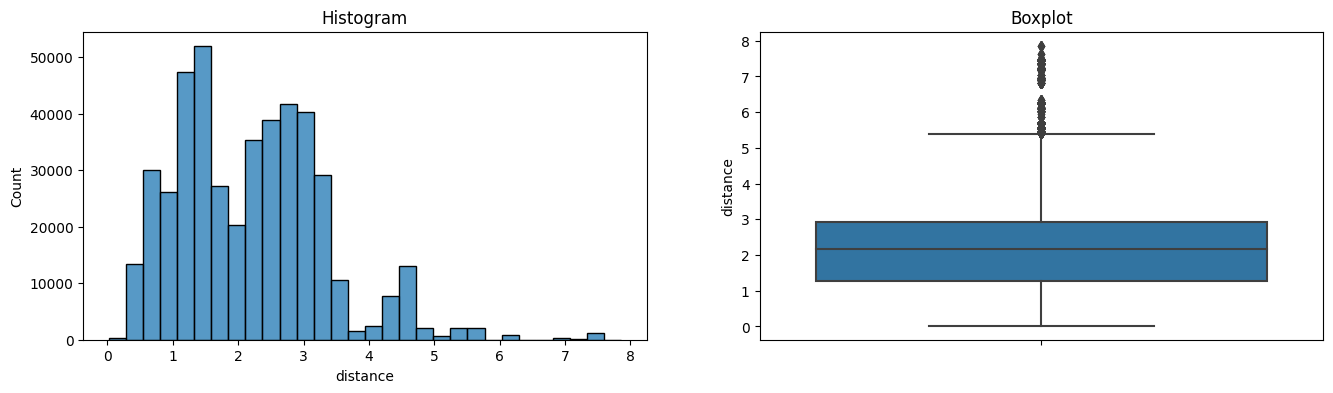

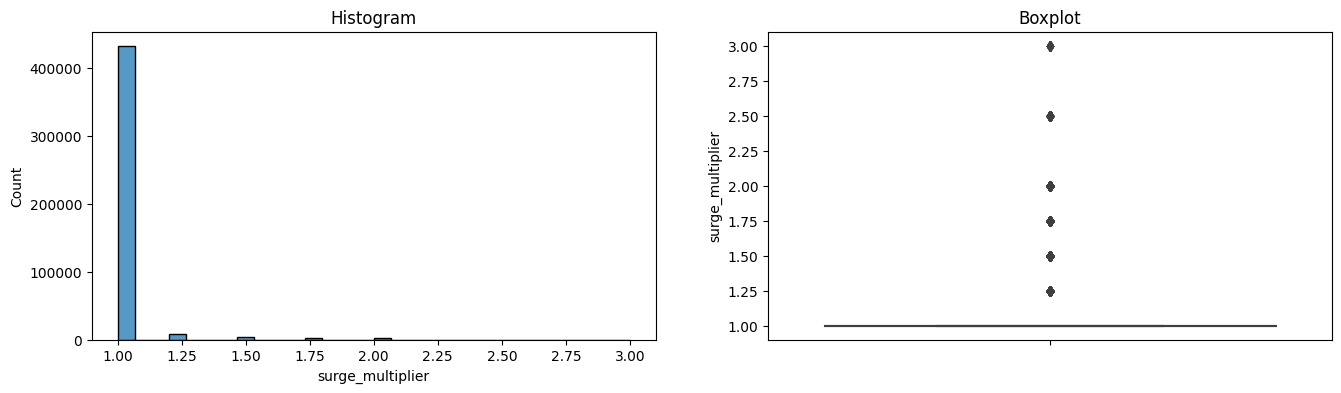

In [ ]:
diagnostic_plots(X_train, 'distance')
diagnostic_plots(X_train, 'surge_multiplier')

In [ ]:
print('\nSkewness Value : ', X_train['distance'].skew())
print('\nSkewness Value : ', X_train['surge_multiplier'].skew())


Skewness Value :  0.814879827430851

Skewness Value :  7.960324247931635


distance dan surge_multiplier tidak terdistribusi secara normal

Setelah dilakukan analisis kedua column tersebut teridentifikasi sebagai skewed variabel, oleh karena itu IQR method digunakan untuk mengidentifikasi outlier pada Skewed variabel

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Mencari upper boundary dan lower boundary menggunakan IQR method

In [ ]:
Dist_upper_boundary, Dist_lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
Dist_upper_boundary, Dist_lower_boundary

SM_upper_limit, SM_lower_limit = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
SM_upper_limit, SM_lower_limit

print('Distance upper limit         : ', Dist_upper_boundary)
print('Distance lower limit         : ',  Dist_lower_boundary, '\n')
print('surge multiplier upper limit : ',  SM_upper_limit)
print('surge multiplier lower limit : ', SM_lower_limit, '\n')

Distance upper limit         :  5.405
Distance lower limit         :  -1.195 

surge multiplier upper limit :  1.0
surge multiplier lower limit :  1.0 



Pada varibel 'distance' memiliki upper limit 5 dan variabel 'surge_multiplier' memiliki upper limit 1

In [ ]:
print('Total distance : {}'.format(len(X_train)))
print('distance more than 5   : {}'.format(len(X_train[X_train['distance'] > Dist_upper_boundary])))
print('')
print('% distance more than 5 : {}'.format(len(X_train[X_train['distance'] > Dist_upper_boundary])/len(X_train) * 100))

Total distance : 446583
distance more than 5   : 5038

% distance more than 5 : 1.1281217601207392


Setelah dilakukan identifikasi variabel 'distance' memiliki 1% persen Outlier

In [ ]:
print('total surge_multiplier : {}'.format(len(X_train)))
print('surge_multiplier more than 1  : {}'.format(len(X_train[X_train['surge_multiplier'] > SM_upper_limit])))
print('')
print('% surge_multiplier more than 1 : {}'.format(len(X_train[X_train['surge_multiplier'] > SM_upper_limit])/len(X_train) * 100))

total surge_multiplier : 446583
surge_multiplier more than 1  : 14782

% surge_multiplier more than 1 : 3.3100229968449315


Setelah dilakukan identifikasi variabel 'distance' memiliki 1% persen Outlier

###Capping Method

capping atau winorizing data. Ini adalah metode di mana Anda menetapkan nilai maksimum fitur ke nilai tertentu. Anda dapat memutuskan untuk menetapkan 1% terbawah ke nilai persentil kedua, dan 1% teratas ke nilai persentil ke-99, Mengatasi Outlier dengan menggunakan metode Capping agar tidak perlu menghapus data

In [ ]:
cols = ['distance', 'surge_multiplier']

In [ ]:
def capping_out(df, cols, from_low_bond, from_high_bond):

  for col in cols:
    stats.mstats.winsorize(a=df[col], limits=(from_low_bond, from_high_bond), inplace =True)

In [ ]:
print("before capping")
X_train.describe()

before capping


,distance,surge_multiplier
count,446583.00000,446583.000000
mean,2.19019,1.015244
std,1.13540,0.096271
min,0.02000,1.000000
25%,1.28000,1.000000
50%,2.16000,1.000000
75%,2.93000,1.000000
max,7.86000,3.000000


In [ ]:
capping_out(X_train, cols, 0.1, 0.1)

In [ ]:
capping_out(X_test, cols, 0.1, 0.1)

In [ ]:
print("after capping")
X_train.describe()

after capping


,distance,surge_multiplier
count,446583.000000,446583.0
mean,2.115586,1.0
std,0.874885,0.0
min,0.880000,1.0
25%,1.280000,1.0
50%,2.160000,1.0
75%,2.930000,1.0
max,3.410000,1.0


##One-Hot-Encoding

Gunakan One-Hot-Encoder untuk mengubah categorical column menjadi numeric

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modeling

In [ ]:
model1 = LinearRegression()
model = model1.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.8855717067612479

In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Mean Squere error      : ',mse)
print('Root Mean Squere Error : ',rmse)

Mean Squere error      :  9.870640964586064
Root Mean Squere Error :  3.1417576234627114


MSE dan RMSE umumnya digunakan dalam pemodelan regresi untuk mengukur seberapa akurat model dalam melakukan prediksi. Semakin rendah nilai MSE atau RMSE, semakin baik performa model dalam memprediksi data baru.

Dalam konteks ini, MSE sebesar 9.870640964586064 menunjukkan bahwa rata-rata kuadrat dari kesalahan prediksi adalah sekitar 9.87. Sedangkan RMSE sebesar 3.1417576234627114 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 3.14 dalam satuan yang sama dengan variabel target aslinya. Semakin kecil nilai RMSE, semakin akurat model dalam memprediksi nilai aktual

In [ ]:
performance = pd.DataFrame({'Predictions':y_pred,'Actual Values':y_test})
performance['error']=performance['Actual Values']-performance['Predictions']
performance.head()

,Predictions,Actual Values,error
677566,21.555302,19.5,-2.055302
308691,11.414677,10.5,-0.914677
396241,8.945927,5.0,-3.945927
136589,17.727177,16.5,-1.227177
198998,34.852177,38.5,3.647823


- Kolom "Predictions" (Prediksi): Menunjukkan nilai yang diprediksi untuk setiap data. Misalnya, pada baris pertama, nilai prediksi adalah 21.555302.
- Kolom "Actual Values" (Nilai Aktual): Menunjukkan nilai aktual yang sebenarnya untuk setiap data. Misalnya, pada baris pertama, nilai aktual adalah 19.5.
- Kolom "error" (Kesalahan): Menunjukkan selisih antara nilai prediksi dan nilai aktual. Misalnya, pada baris pertama, kesalahan dihitung sebagai -2.055302 (prediksi - nilai aktual).

Tabel ini memberikan informasi tentang kualitas prediksi dengan membandingkan nilai prediksi dengan nilai aktual. Kolom "error" (Kesalahan) menunjukkan seberapa jauh prediksi tersebut dari nilai aktualnya. Jika nilai kesalahan positif, berarti prediksi lebih tinggi dari nilai aktualnya, sedangkan jika nilai kesalahan negatif, berarti prediksi lebih rendah dari nilai aktualnya.

Dengan menggunakan tabel ini, Anda dapat menganalisis kesalahan prediksi, menghitung metrik evaluasi seperti mean absolute error (MAE)

#Save model

In [ ]:
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb'))

pickle.dump(model, open('liniear.pkl','wb'))

model = pickle.load(open('liniear.pkl','rb'))